In [107]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
df=pd.read_excel('files_second_analytics/Bariatric Project Study Data 2025_mod.xlsx', sheet_name='Sheet1')

PRE-OP DATASET

In [108]:
core_X_data=df[['gender', 'age', 'height', 'weight', 'bmi', 'family_hist_cnt', 'chronic_meds_cnt','procedure_category','antibiotics','cholecystectomy_repair','hiatus_hernia_repair','drain']].copy()
cm_cols= [col for col in df.columns if col.startswith('CM_')]

cm_data = df[cm_cols].fillna(0).astype(int)
cm_data
zero_only = [col for col in cm_data.columns if (cm_data[col] == 0).all()]
cm_data = cm_data.drop(columns=zero_only)

# finally, join the filtered CM_ data back into your core set
core_X_data = core_X_data.join(cm_data)
core_X_data.fillna(0, inplace=True)
print(core_X_data.isna().sum())  # should all be zero

# inspect result
print("Dropped CM columns:", zero_only)
print("Remaining columns in CM data:", cm_data.columns.tolist())



gender                    0
age                       0
height                    0
weight                    0
bmi                       0
family_hist_cnt           0
chronic_meds_cnt          0
procedure_category        0
antibiotics               0
cholecystectomy_repair    0
hiatus_hernia_repair      0
drain                     0
CM_AIDS                   0
CM_ANEMDEF                0
CM_ARTH                   0
CM_CHF                    0
CM_DEPRESS                0
CM_DM                     0
CM_DMCX                   0
CM_HTN_C                  0
CM_HYPOTHY                0
CM_LIVER                  0
CM_OBESE                  0
CM_PSYCH                  0
CM_SMOKE                  0
CM_APNEA                  0
CM_CHOLSTRL               0
CM_OSTARTH                0
CM_HPLD                   0
dtype: int64
Dropped CM columns: ['CM_ALCOHOL', 'CM_BLDLOSS', 'CM_CHRNLUNG', 'CM_COAG', 'CM_DRUG', 'CM_LYMPH', 'CM_LYTES', 'CM_METS', 'CM_NEURO', 'CM_PARA', 'CM_PERIVASC', 'CM_PULMCIRC', '

In [109]:
# Check whether CM_NEURO survived the filtering
if 'CM_CHF' in core_X_data.columns:
    print("CM_CHF is present in core_X_data!")
else:
    
    print("CM_CHFis NOT in core_X_data.")
if 'CM_DRUG' in core_X_data.columns:
    print("CM_NEURO is present in core_X_data!")
else:
    print("CM_NEURO is NOT in core_X_data.")


CM_CHF is present in core_X_data!
CM_NEURO is NOT in core_X_data.


In [110]:
# Identify all complication-related columns
comp_cols = [col for col in df.columns if 'comp' in col.lower()]

# Create new dataset without the original complication columns
df_new = df.drop(columns=comp_cols)

# Add a single 'complication' column: 1 if any original comp column == 1, else 0
df_new['complication'] = (df[comp_cols] == 1).any(axis=1).astype(int)

# Display new dataset shape
print("New dataset shape (rows, columns):", df_new.shape)

# Show a sample of the new 'complication' column alongside the ID
# Show the first 10 rows of id and complication
print(df_new[['id', 'complication']].head(10))
print("First 15 column names:", df_new.columns.tolist())

New dataset shape (rows, columns): (344, 111)
        id  complication
0  45488.0             0
1      NaN             0
2  37462.0             1
3  40661.0             0
4      NaN             0
5  40699.0             0
6  38920.0             0
7  37827.0             0
8  47189.0             0
9      NaN             0
First 15 column names: ['doctor', 'procedure_category', 'hospitalDesc', 'hospital_wardDesc', 'days_since_admission', 'length_of_stay', 'gender', 'age', 'weight', 'height', 'bmi', 'family_hist_cnt', 'chronic_meds_cnt', 'cm_count', 'morbidity', 'CM_AIDS', 'CM_ALCOHOL', 'CM_ANEMDEF', 'CM_ARTH', 'CM_BLDLOSS', 'CM_CHF', 'CM_CHRNLUNG', 'CM_COAG', 'CM_DEPRESS', 'CM_DM', 'CM_DMCX', 'CM_DRUG', 'CM_HTN_C', 'CM_HYPOTHY', 'CM_LIVER', 'CM_LYMPH', 'CM_LYTES', 'CM_METS', 'CM_NEURO', 'CM_OBESE', 'CM_PARA', 'CM_PERIVASC', 'CM_PSYCH', 'CM_PULMCIRC', 'CM_RENLFAIL', 'CM_SMOKE', 'CM_TUMOR', 'CM_ULCER', 'CM_VALVE', 'CM_WGHTLOSS', 'CM_APNEA', 'CM_CHOLSTRL', 'CM_OSTARTH', 'CM_HPLD', 'emergency_

In [111]:
core_Y_data=df_new[["complication"]]

core_Y_data.head()

,complication
0,0
1,0
2,1
3,0
4,0


In [112]:
core_Y_data[core_Y_data['complication'] == 1].count()

complication    34
dtype: int64

In [113]:
# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

DATASET OVERVIEW
Shape: (344, 121)
Features in core_X_data: 29
Target variable shape: (344, 1)

Class Distribution:
No complications: 310 (90.1%)
Complications: 34 (9.9%)
Imbalance Ratio: 1:9.1


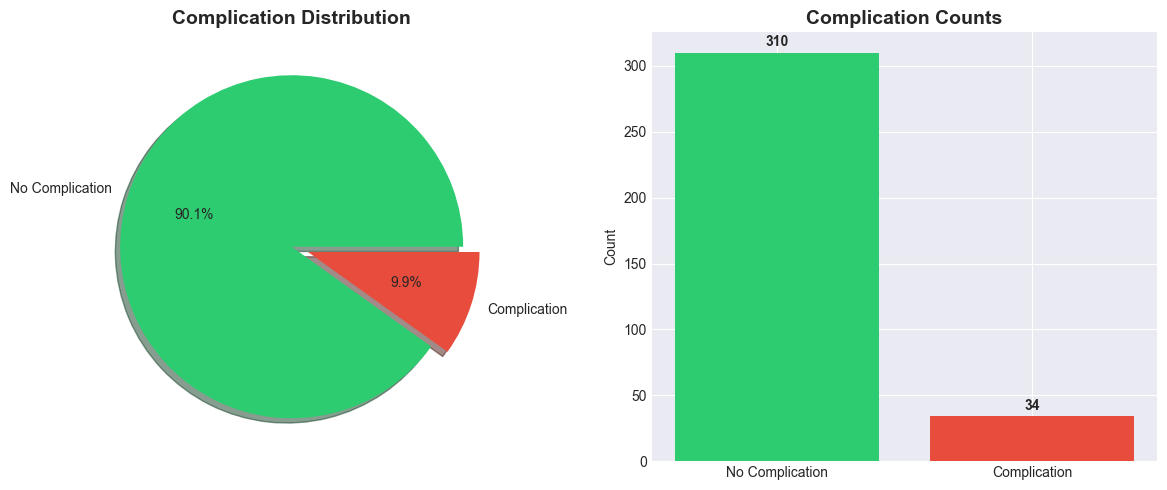

In [114]:
# Basic overview
print("="*50)
print("DATASET OVERVIEW")
print("="*50)
print(f"Shape: {df.shape}")
print(f"Features in core_X_data: {core_X_data.shape[1]}")
print(f"Target variable shape: {core_Y_data.shape}")

# Class imbalance
comp_counts = core_Y_data['complication'].value_counts()
print(f"\nClass Distribution:")
print(f"No complications: {comp_counts[0]} ({comp_counts[0]/len(core_Y_data)*100:.1f}%)")
print(f"Complications: {comp_counts[1]} ({comp_counts[1]/len(core_Y_data)*100:.1f}%)")
print(f"Imbalance Ratio: 1:{comp_counts[0]/comp_counts[1]:.1f}")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart
colors = ['#2ecc71', '#e74c3c']
ax1.pie(comp_counts.values, labels=['No Complication', 'Complication'], 
        autopct='%1.1f%%', colors=colors, explode=(0, 0.1), shadow=True)
ax1.set_title('Complication Distribution', fontsize=14, fontweight='bold')

# Bar chart
ax2.bar(['No Complication', 'Complication'], comp_counts.values, color=colors)
ax2.set_ylabel('Count')
ax2.set_title('Complication Counts', fontsize=14, fontweight='bold')
for i, v in enumerate(comp_counts.values):
    ax2.text(i, v + 5, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [115]:
# Missing values analysis
missing_df = pd.DataFrame({
    'Missing_Count': core_X_data.isnull().sum(),
    'Missing_Percentage': (core_X_data.isnull().sum() / len(core_X_data)) * 100
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("="*50)
print("MISSING VALUES ANALYSIS")
print("="*50)
print(f"Columns with missing values: {len(missing_df)}/{core_X_data.shape[1]}")
print(f"Total completeness: {(1 - core_X_data.isnull().sum().sum()/(core_X_data.shape[0]*core_X_data.shape[1]))*100:.1f}%")

if len(missing_df) > 0:
    print("\nTop missing columns:")
    print(missing_df.head(10))
    
    # Visualization
    plt.figure(figsize=(10, 6))
    top_missing = missing_df.head(15)
    plt.barh(range(len(top_missing)), top_missing['Missing_Percentage'], color='coral')
    plt.yticks(range(len(top_missing)), top_missing.index)
    plt.xlabel('Missing Percentage (%)')
    plt.title('Top 15 Columns with Missing Values', fontsize=14, fontweight='bold')
    
    for i, v in enumerate(top_missing['Missing_Percentage']):
        plt.text(v + 0.1, i, f'{v:.1f}%', va='center')
    
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found!")

MISSING VALUES ANALYSIS
Columns with missing values: 0/29
Total completeness: 100.0%
No missing values found!


Outlier detection

VARIABLE TYPES
Numeric variables: 26
Categorical variables: 3

Numeric: ['age', 'height', 'weight', 'bmi', 'family_hist_cnt', 'chronic_meds_cnt', 'cholecystectomy_repair', 'hiatus_hernia_repair', 'drain', 'CM_AIDS', 'CM_ANEMDEF', 'CM_ARTH', 'CM_CHF', 'CM_DEPRESS', 'CM_DM', 'CM_DMCX', 'CM_HTN_C', 'CM_HYPOTHY', 'CM_LIVER', 'CM_OBESE', 'CM_PSYCH', 'CM_SMOKE', 'CM_APNEA', 'CM_CHOLSTRL', 'CM_OSTARTH', 'CM_HPLD']

Categorical: ['gender', 'procedure_category', 'antibiotics']


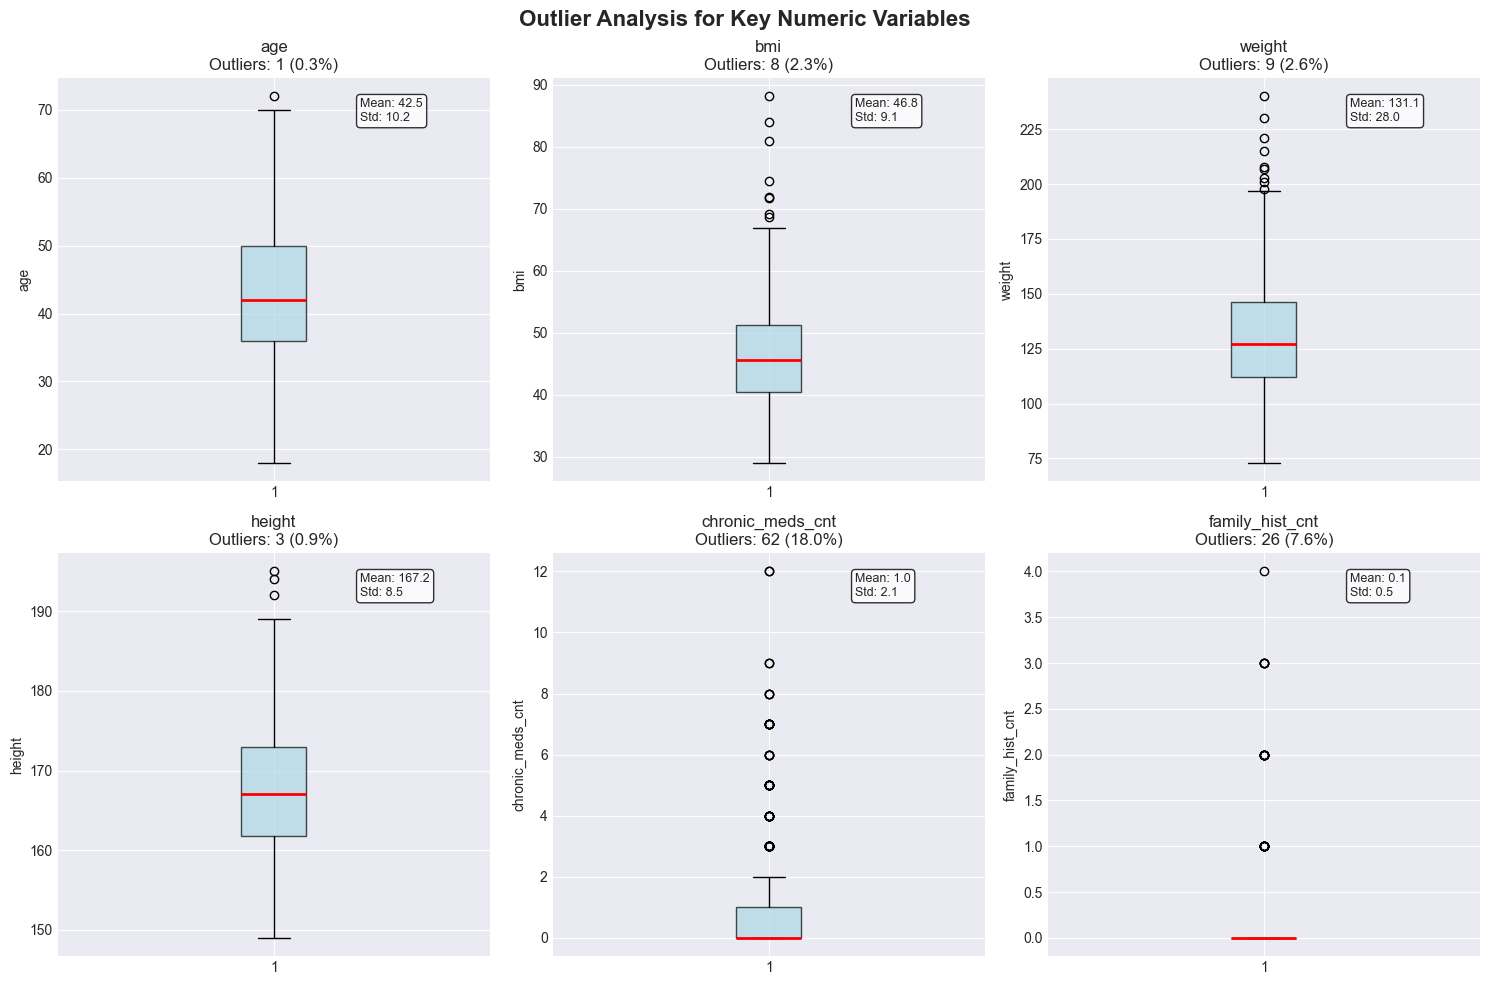

In [116]:
# Identify numeric and categorical columns
numeric_cols = core_X_data.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = core_X_data.select_dtypes(include=['object']).columns.tolist()

print("="*50)
print("VARIABLE TYPES")
print("="*50)
print(f"Numeric variables: {len(numeric_cols)}")
print(f"Categorical variables: {len(categorical_cols)}")
print(f"\nNumeric: {numeric_cols}")
print(f"\nCategorical: {categorical_cols}")

# Outlier analysis for key numeric variables
key_numeric = ['age', 'bmi', 'weight', 'height', 'chronic_meds_cnt', 'family_hist_cnt']
key_numeric = [col for col in key_numeric if col in numeric_cols]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, var in enumerate(key_numeric):
    if idx < len(axes):
        data = core_X_data[var].dropna()
        
        # Calculate outliers
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data < lower_bound) | (data > upper_bound)]
        
        # Box plot
        axes[idx].boxplot(data, vert=True, patch_artist=True,
                         boxprops=dict(facecolor='lightblue', alpha=0.7),
                         medianprops=dict(color='red', linewidth=2))
        
        # Add statistics
        axes[idx].set_ylabel(var)
        axes[idx].set_title(f'{var}\nOutliers: {len(outliers)} ({len(outliers)/len(data)*100:.1f}%)')
        
        # Add text with stats
        stats_text = f'Mean: {data.mean():.1f}\nStd: {data.std():.1f}'
        axes[idx].text(0.7, 0.95, stats_text, transform=axes[idx].transAxes, 
                      fontsize=9, verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.suptitle('Outlier Analysis for Key Numeric Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Number of rows with height = 0: 0


Empty DataFrame
Columns: [gender, age, height, weight, bmi, family_hist_cnt, chronic_meds_cnt, procedure_category, antibiotics, cholecystectomy_repair, hiatus_hernia_repair, drain, CM_AIDS, CM_ANEMDEF, CM_ARTH, CM_CHF, CM_DEPRESS, CM_DM, CM_DMCX, CM_HTN_C, CM_HYPOTHY, CM_LIVER, CM_OBESE, CM_PSYCH, CM_SMOKE, CM_APNEA, CM_CHOLSTRL, CM_OSTARTH, CM_HPLD]
Index: []

[0 rows x 29 columns]
